TASK 1.1: Line Chart for Yearly Automobile Sales

In [4]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read CSV file
df = pd.read_csv("automobile_sales.csv")

# Display the first few rows
df.head()


Saving automobile_sales.csv to automobile_sales.csv


,Year,Vehicle_Type,Sales,Recession_Period,GDP,Season,Average_Vehicle_Price,Unemployment_Rate,Advertisement_Expenditure
0,2000,Sedan,171958,0,21.948145,Summer,49802,8.457837,16284
1,2000,SUV,104886,0,16.687491,Summer,24426,6.214742,16636
2,2000,Truck,66023,0,19.763327,Winter,20769,8.053991,11949
3,2000,Hatchback,55311,0,24.883173,Winter,40939,7.281572,11396
4,2000,Electric,180608,0,17.871620,Summer,44233,3.326660,7747


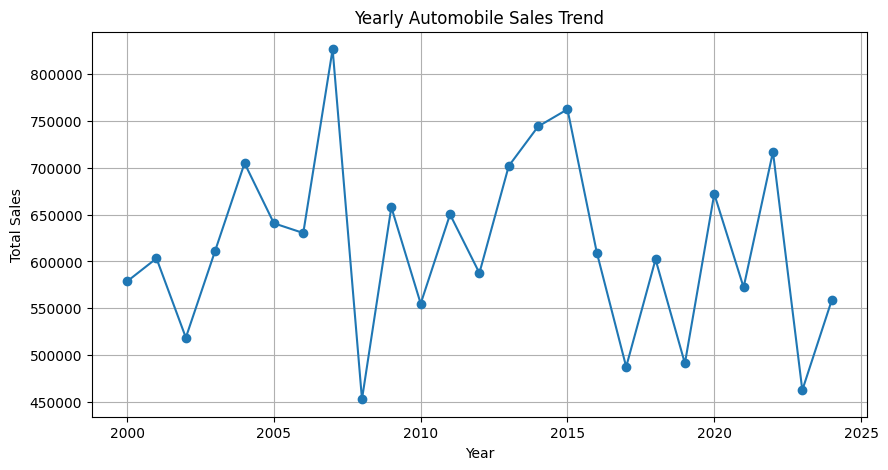

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("automobile_sales.csv")

# Aggregate sales per year
yearly_sales = df.groupby("Year")["Sales"].sum()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Automobile Sales Trend")
plt.grid(True)
plt.show()


TASK 1.2: Vehicle Type Trends During Recession


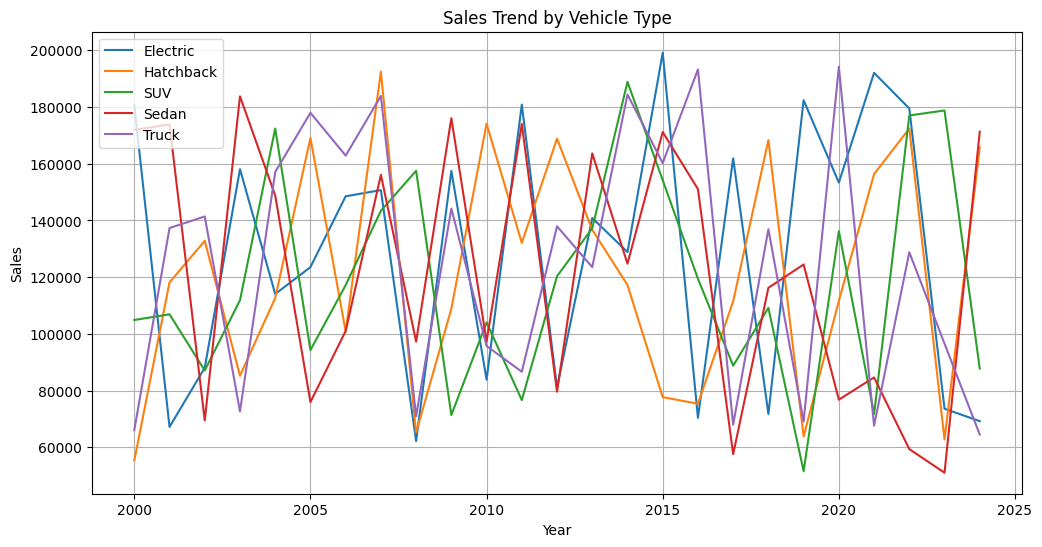

In [6]:
# Group by Year and Vehicle Type
vehicle_sales = df.groupby(["Year", "Vehicle_Type"])["Sales"].sum().unstack()

# Plot multiple lines
plt.figure(figsize=(12, 6))
for vehicle in vehicle_sales.columns:
    plt.plot(vehicle_sales.index, vehicle_sales[vehicle], label=vehicle)

plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Trend by Vehicle Type")
plt.legend()
plt.grid(True)
plt.show()

TASK 1.3: Seaborn Visualization - Recession vs Non-Recession

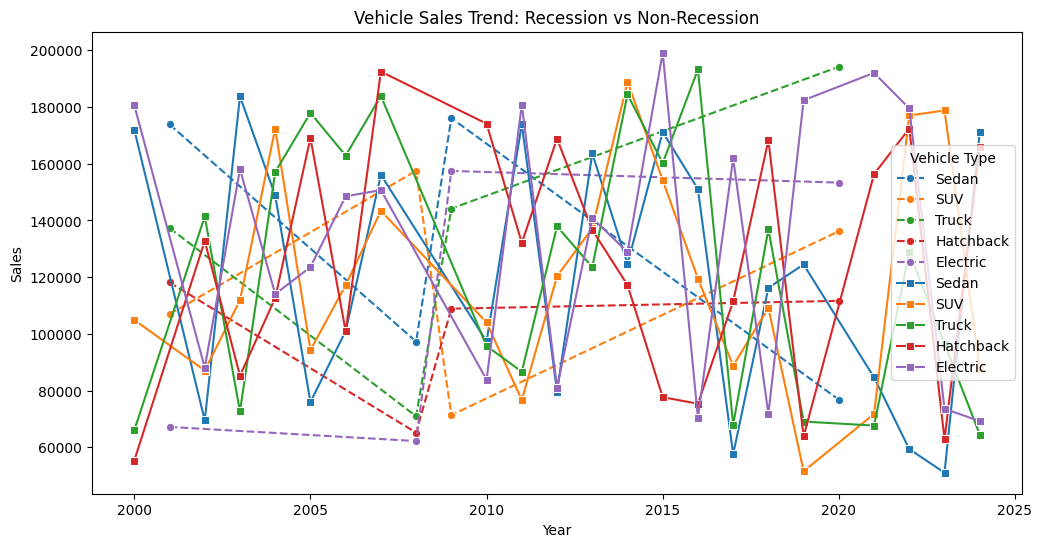

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering data
recession_sales = df[df["Recession_Period"] == 1]
non_recession_sales = df[df["Recession_Period"] == 0]

# Seaborn line plot
plt.figure(figsize=(12, 6))

# Recession period
sns.lineplot(x="Year", y="Sales", hue="Vehicle_Type", data=recession_sales, linestyle="dashed", marker="o")

# Non-recession period
sns.lineplot(x="Year", y="Sales", hue="Vehicle_Type", data=non_recession_sales, marker="s")

plt.title("Vehicle Sales Trend: Recession vs Non-Recession")
plt.legend(title="Vehicle Type")  # Ensures the legend is clear
plt.show()


TASK 1.4: Subplots for GDP Variations

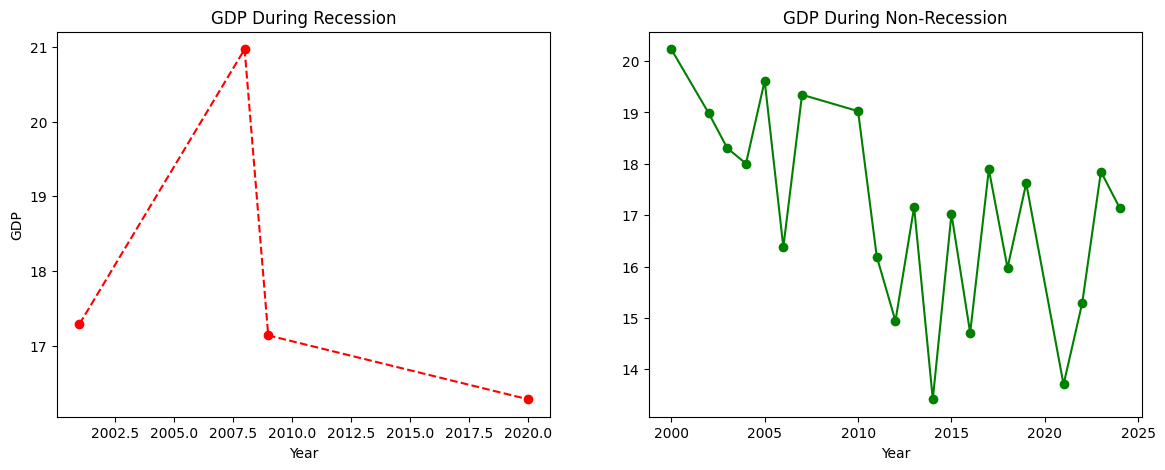

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GDP trends during recession
axes[0].plot(recession_sales.groupby("Year")["GDP"].mean(), marker='o', linestyle='--', color='r')
axes[0].set_title("GDP During Recession")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")

# GDP trends during non-recession
axes[1].plot(non_recession_sales.groupby("Year")["GDP"].mean(), marker='o', linestyle='-', color='g')
axes[1].set_title("GDP During Non-Recession")
axes[1].set_xlabel("Year")

plt.show()


TASK 1.5: Bubble Plot for Seasonality

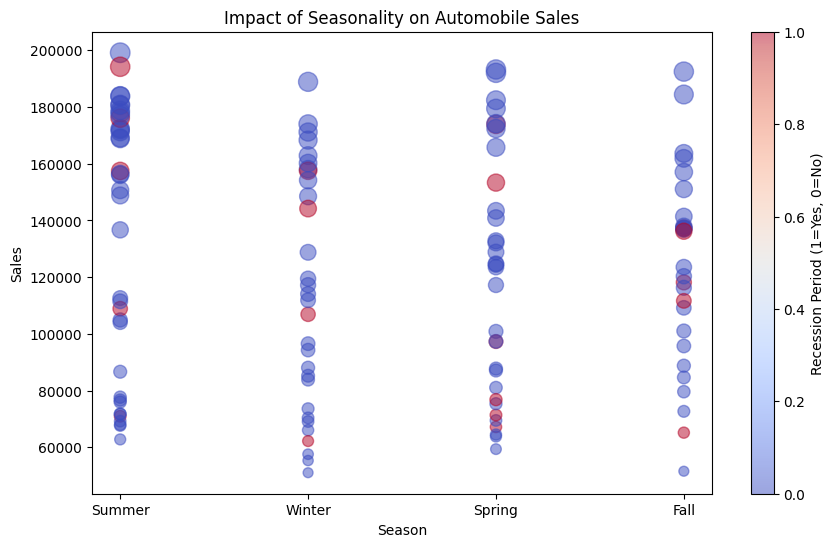

In [9]:
plt.figure(figsize=(10, 6))
sizes = df["Sales"] / 1000  # Adjust bubble size
plt.scatter(df["Season"], df["Sales"], s=sizes, alpha=0.5, c=df["Recession_Period"], cmap="coolwarm")
plt.xlabel("Season")
plt.ylabel("Sales")
plt.title("Impact of Seasonality on Automobile Sales")
plt.colorbar(label="Recession Period (1=Yes, 0=No)")
plt.show()


TASK 1.6: Scatter Plot for Price vs Sales During Recession

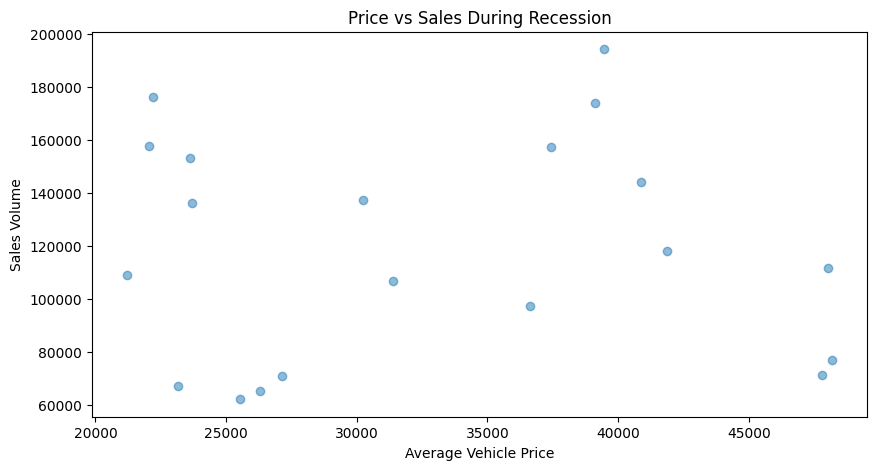

In [10]:
recession_data = df[df["Recession_Period"] == 1]

plt.figure(figsize=(10, 5))
plt.scatter(recession_data["Average_Vehicle_Price"], recession_data["Sales"], alpha=0.5)
plt.xlabel("Average Vehicle Price")
plt.ylabel("Sales Volume")
plt.title("Price vs Sales During Recession")
plt.show()


TASK 1.7: Pie Chart for Advertising Spend (Recession vs Non-Recession)

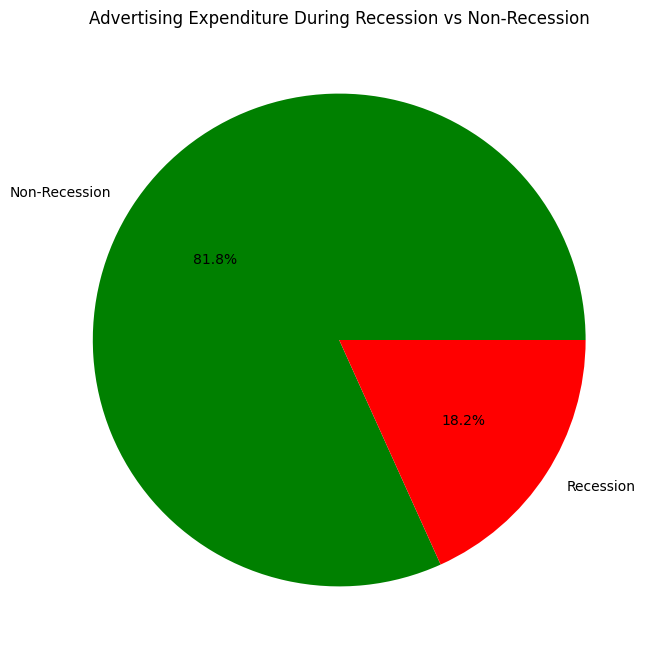

In [11]:
ad_expenditure = df.groupby("Recession_Period")["Advertisement_Expenditure"].sum()
labels = ["Non-Recession", "Recession"]

plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title("Advertising Expenditure During Recession vs Non-Recession")
plt.show()


TASK 1.8: Pie Chart for Ad Expenditure per Vehicle Type (Recession)

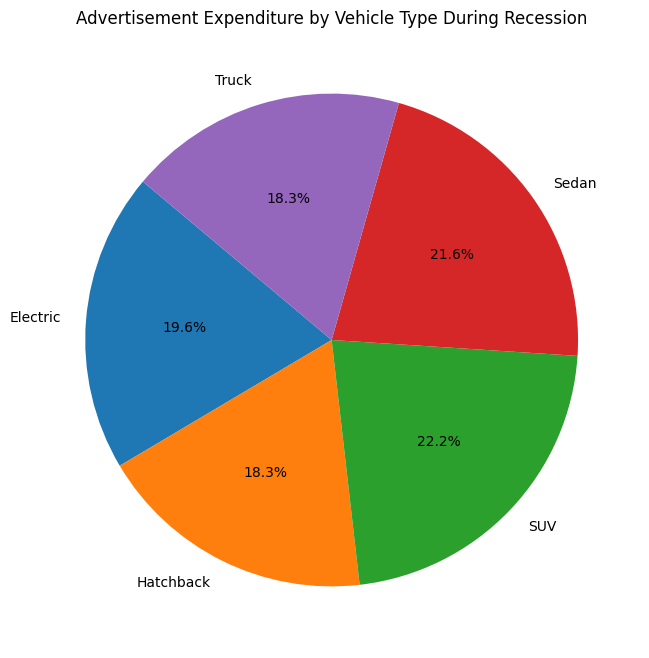

In [12]:
recession_ads = recession_data.groupby("Vehicle_Type")["Advertisement_Expenditure"].sum()

plt.figure(figsize=(8, 8))
plt.pie(recession_ads, labels=recession_ads.index, autopct="%1.1f%%", startangle=140)
plt.title("Advertisement Expenditure by Vehicle Type During Recession")
plt.show()


TASK 1.9: Line Plot for Unemployment Rate vs Sales

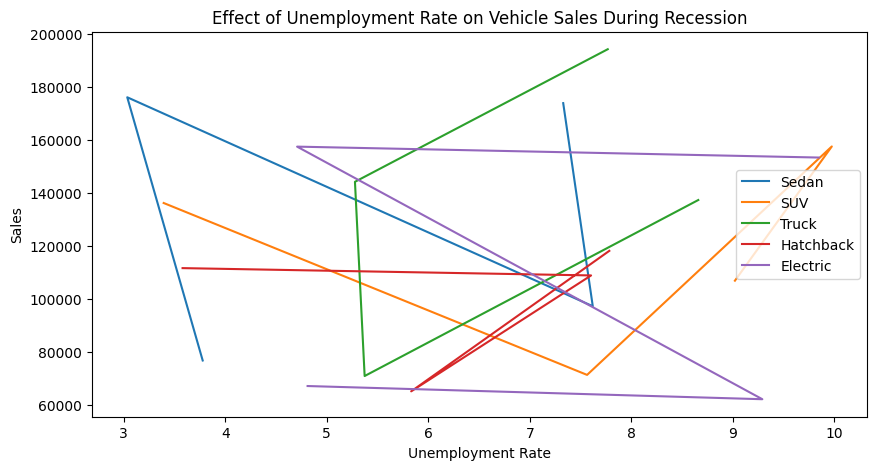

In [13]:
plt.figure(figsize=(10, 5))
for vehicle in df["Vehicle_Type"].unique():
    subset = recession_data[recession_data["Vehicle_Type"] == vehicle]
    plt.plot(subset["Unemployment_Rate"], subset["Sales"], label=vehicle)

plt.xlabel("Unemployment Rate")
plt.ylabel("Sales")
plt.title("Effect of Unemployment Rate on Vehicle Sales During Recession")
plt.legend()
plt.show()


Part 2: Dash Application

In [30]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Sample Data (Replace with actual dataset)
df = pd.read_csv("automobile_sales.csv")
#TASK 2.1: Create Dash App
# Initialize Dash app
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"  # TASK 2.1: Setting a meaningful title

# TASK 2.2: Add drop-downs
app.layout = html.Div([
    html.H1("Automobile Sales Analysis"),

    # Dropdown for vehicle type selection
    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[{'label': v, 'value': v} for v in df["Vehicle_Type"].unique()],
        placeholder="Choose a Vehicle Type"
    ),

    # Dropdown for year selection
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(y), 'value': y} for y in df["Year"].unique()],
        placeholder="Choose a Year"
    ),

    # TASK 2.3: Output container
    html.Div(id="output-container", className="output-style"),

    # Graph placeholders
    dcc.Graph(id='recession-graph'),  # TASK 2.5: Recession Statistics Graph
    dcc.Graph(id='yearly-report-graph')  # TASK 2.6: Yearly Report Statistics Graph
])

# TASK 2.4: Define callback to update the output container and graphs
@app.callback(
    [Output("output-container", "children"),
     Output("recession-graph", "figure"),
     Output("yearly-report-graph", "figure")],
    [Input("vehicle-type-dropdown", "value"),
     Input("year-dropdown", "value")]
)
def update_dashboard(selected_vehicle, selected_year):
    message = ""
    filtered_df = df.copy()

    if selected_vehicle:
        filtered_df = filtered_df[filtered_df["Vehicle_Type"] == selected_vehicle]
        message += f"Showing data for {selected_vehicle}. "

    if selected_year:
        filtered_df = filtered_df[filtered_df["Year"] == selected_year]
        message += f"Year: {selected_year}."

    # TASK 2.5: Recession report visualization
    recession_fig = px.line(filtered_df, x="Year", y="Sales", title="Recession Impact on Sales")

    # TASK 2.6: Yearly statistics visualization
    yearly_fig = px.bar(filtered_df, x="Year", y="Sales", color="Vehicle_Type", title="Yearly Sales Report")

    return message, recession_fig, yearly_fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>